## Лабораторна робота №1.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

Опис датафрейму:

+ **PassengerId**: Унікальний ідентифікатор пасажира.
+ **Survived**: Цей атрибут позначає, чи вижив пасажир. Зазвичай 0 означає, що пасажир не вижив, а 1 - що вижив.
+ **Pclass**: Клас квитка, який придбав пасажир. Має три категорії: 1 - перший клас, 2 - другий клас, 3 - третій клас.
+ **Name**: Ім'я пасажира.
+ **Sex**: Стать пасажира (чоловік або жінка).
+ **Age**: Вік пасажира.
+ **SibSp**: Кількість братів, сестер, дружин чи чоловіків, які подорожують разом з пасажиром.
+ **Parch**: Кількість батьків або дітей, які подорожують разом з пасажиром.
+ **Ticket**: Номер квитка.
+ **Fare**: Вартість квитка.
+ **Cabin**: Номер каюти, в якій перебував пасажир.
+ **Embarked**: Порт, з якого пасажир посадився на корабель (C - Cherbourg, Q - Queenstown, S - Southampton).

**Завдання: навчити дерево рішень, яке передбачатиме вижив пасажир або загину, ґрунтуючись на даних пасажирів з датасету titanic.csv.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
#import missingno as msno

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("datasets/titanic.csv")
dataset.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [4]:
pal = sns.color_palette("Spectral")
sns.set_palette(pal)
women_sur = dataset.loc[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)]
man_sur = dataset.loc[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)]
women_sur_per = women_sur.count()[0] *100 / len(dataset[dataset['Sex'] == 'female'])
man_sur_per = man_sur.count()[0] *100 / len(dataset[dataset['Sex'] == 'male'])
print('% виживання серед жінок = ', women_sur_per)
print('% виживання серед чоловіків = ', man_sur_per)

% виживання серед жінок =  74.20382165605096
% виживання серед чоловіків =  18.890814558058924


**Задача 2:** Відтворіть ці графіки  
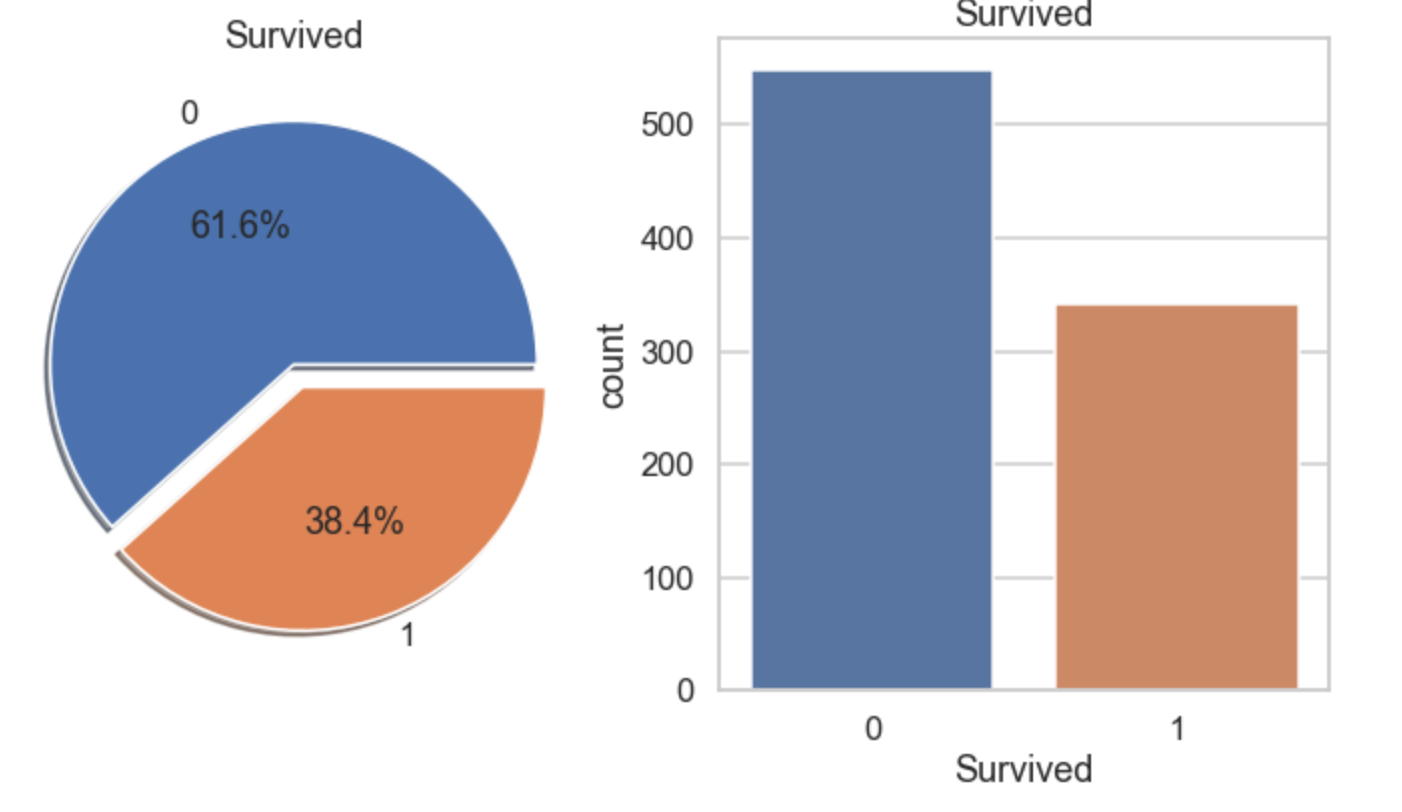


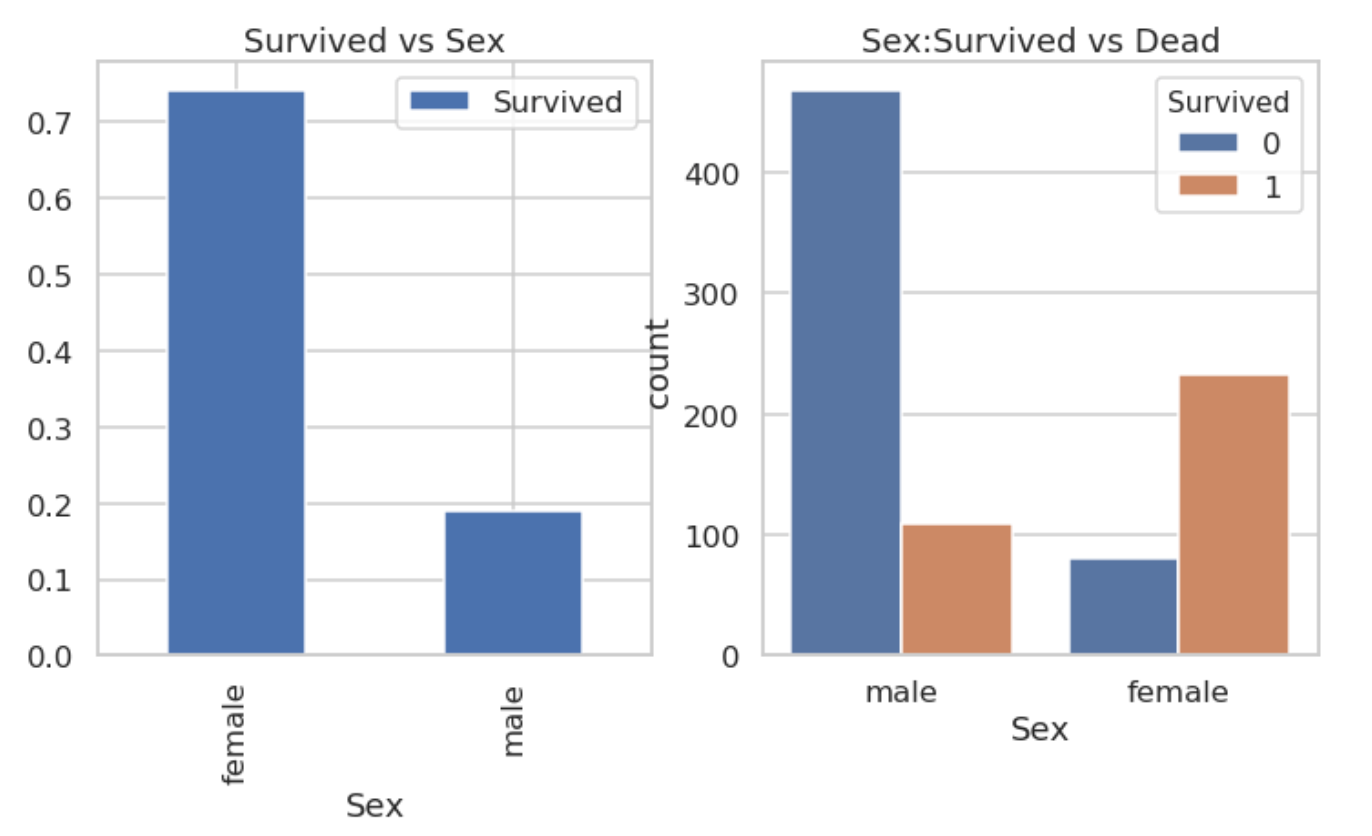

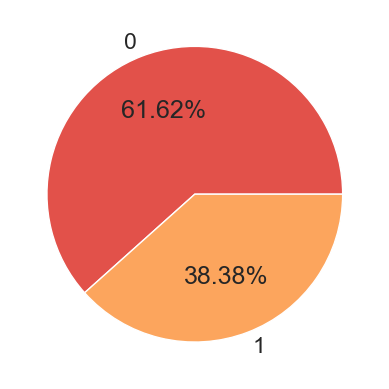

In [5]:
#plot1
data_pie = dataset.groupby('Survived').size()
plt.pie(data_pie, labels = [0, 1], autopct='%.2f%%')
plt.show()


На графіку 1 зображено відсоткове відношення виживання серед усіх пасажирів

Text(0.5, 1.0, 'Survived')

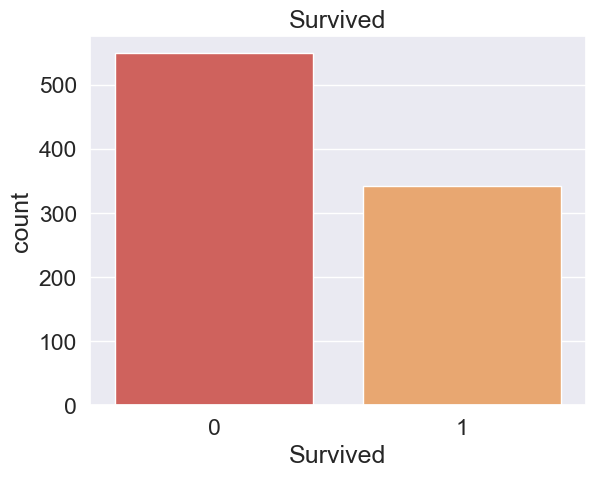

In [6]:
#plot2 
sns.countplot(x = 'Survived', data = dataset)
plt.title('Survived')


Графік 2 відображає кількісне розподілення між вижившими та загинувшими особами

Text(0.5, 1.0, 'Survived vs Sex')

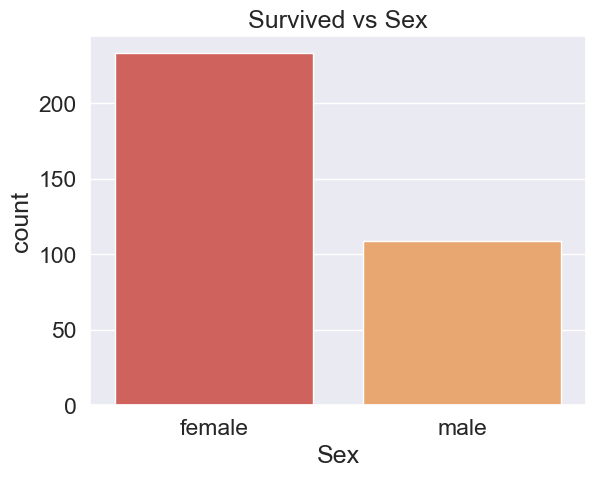

In [7]:
#plot3
survived = dataset.loc[dataset['Survived'] == 1]
sns.countplot(x = 'Sex', data = survived)
plt.title('Survived vs Sex')

Графік 3 відображає кількісне розподілення між вижившимі жінками та чоловіками

Text(0.5, 1.0, 'Sex: Survived vs Dead')

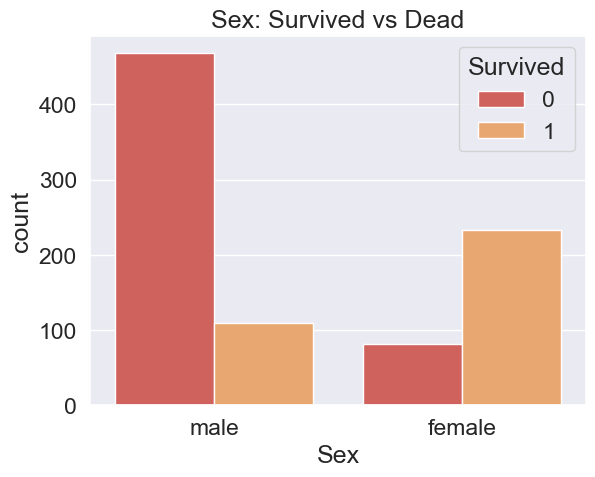

In [8]:
sns.countplot(x = 'Sex', hue = 'Survived', data = dataset)
plt.title('Sex: Survived vs Dead')

Графік 4 відображає кількісне розподілення між вижившими та загинувшими особами відповідно до статі

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [9]:
#code
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [10]:
women = dataset.loc[dataset['Sex'] == 'female']
women['name_new'] = women['Name'].apply(lambda x: x.split('(')[-1].split(' ')[0] if '(' in str(x) else str(x).split('. ')[-1].split(' ')[0])
women['name_new'].value_counts().head()

Anna         14
Mary         13
Elizabeth    11
Margaret     10
Alice         6
Name: name_new, dtype: int64

Відповідь: Anna

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [11]:
#code
men = dataset.loc[dataset['Sex'] == 'male']
men['name_new'] =  men['Name'].apply(lambda x: x.split('(')[-1].split(' ')[0] if '(' in str(x) else str(x).split('. ')[-1].split(' ')[0])
men['name_new'].value_counts().head()

William    35
John       23
George     13
Thomas     13
Charles    12
Name: name_new, dtype: int64

Відповідь: William

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
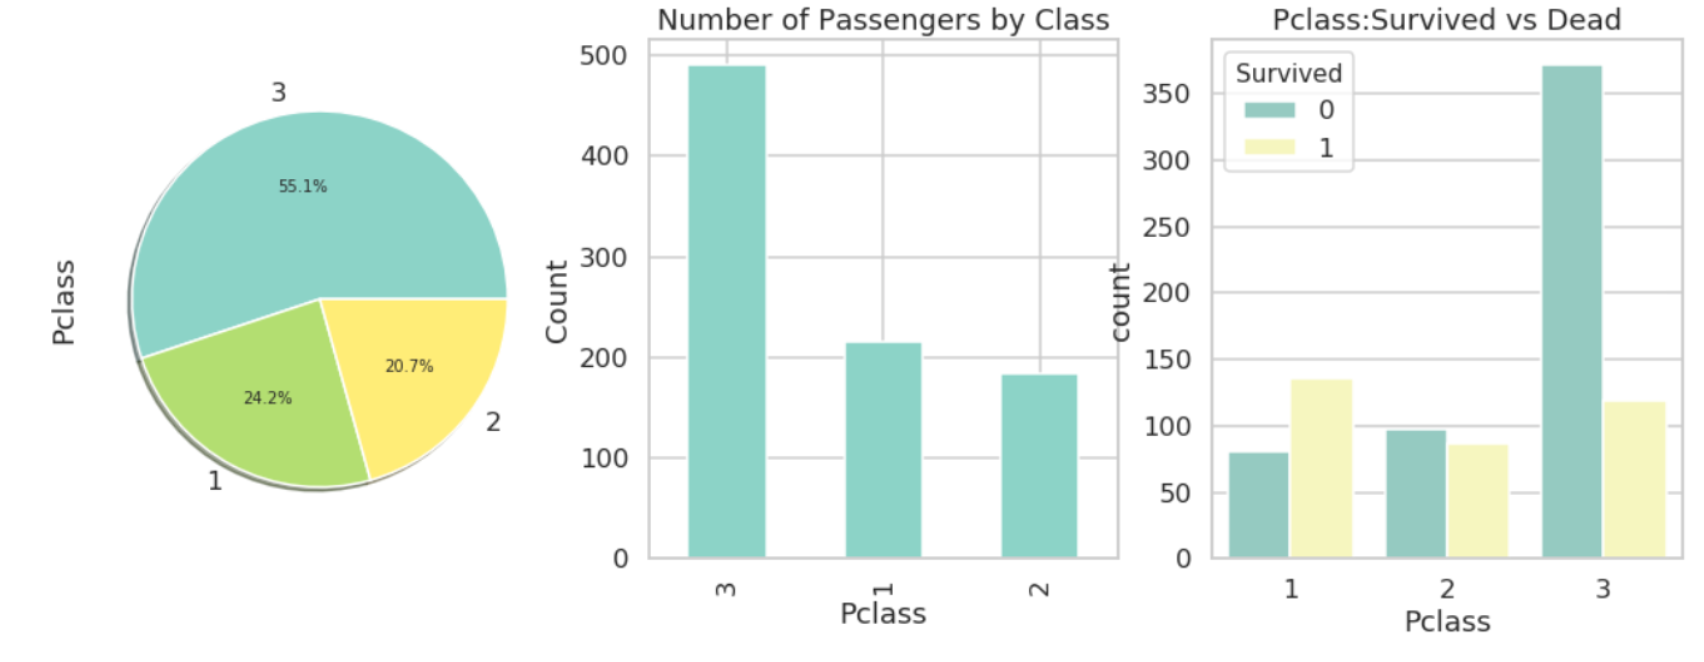

In [14]:
#code
fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(dataset.groupby('Pclass').size(), labels = [1,2,3], autopct='%.2f%%')

ax2 = plt.subplot2grid((1,3),(0,1))
sns.countplot(x = 'Pclass', data = dataset)

ax3 = plt.subplot2grid((1,3),(0,2))
sns.countplot(x = 'Pclass', hue ='Survived', data = dataset)
plt.show()

##### На графіку 1 відображено відсоткове відношення серед усіх пасажирів(виживші та ні) відповідно до класу квитка
##### На графіку 2 відображено кількість серед усіх пасажирів(виживші та ні) відповідно до класу квитка
##### На графіку 3 відображено кількість окремо виживших та загиблих по кожному класу квитка відповідно

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
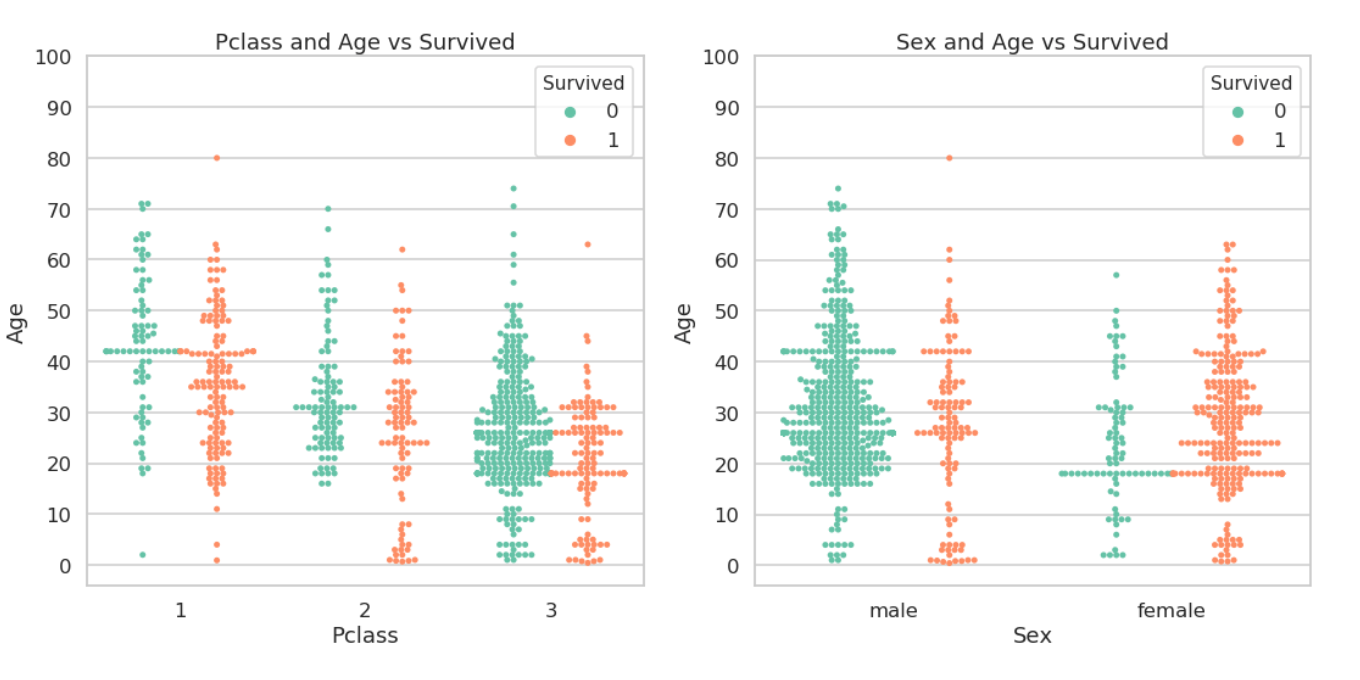![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

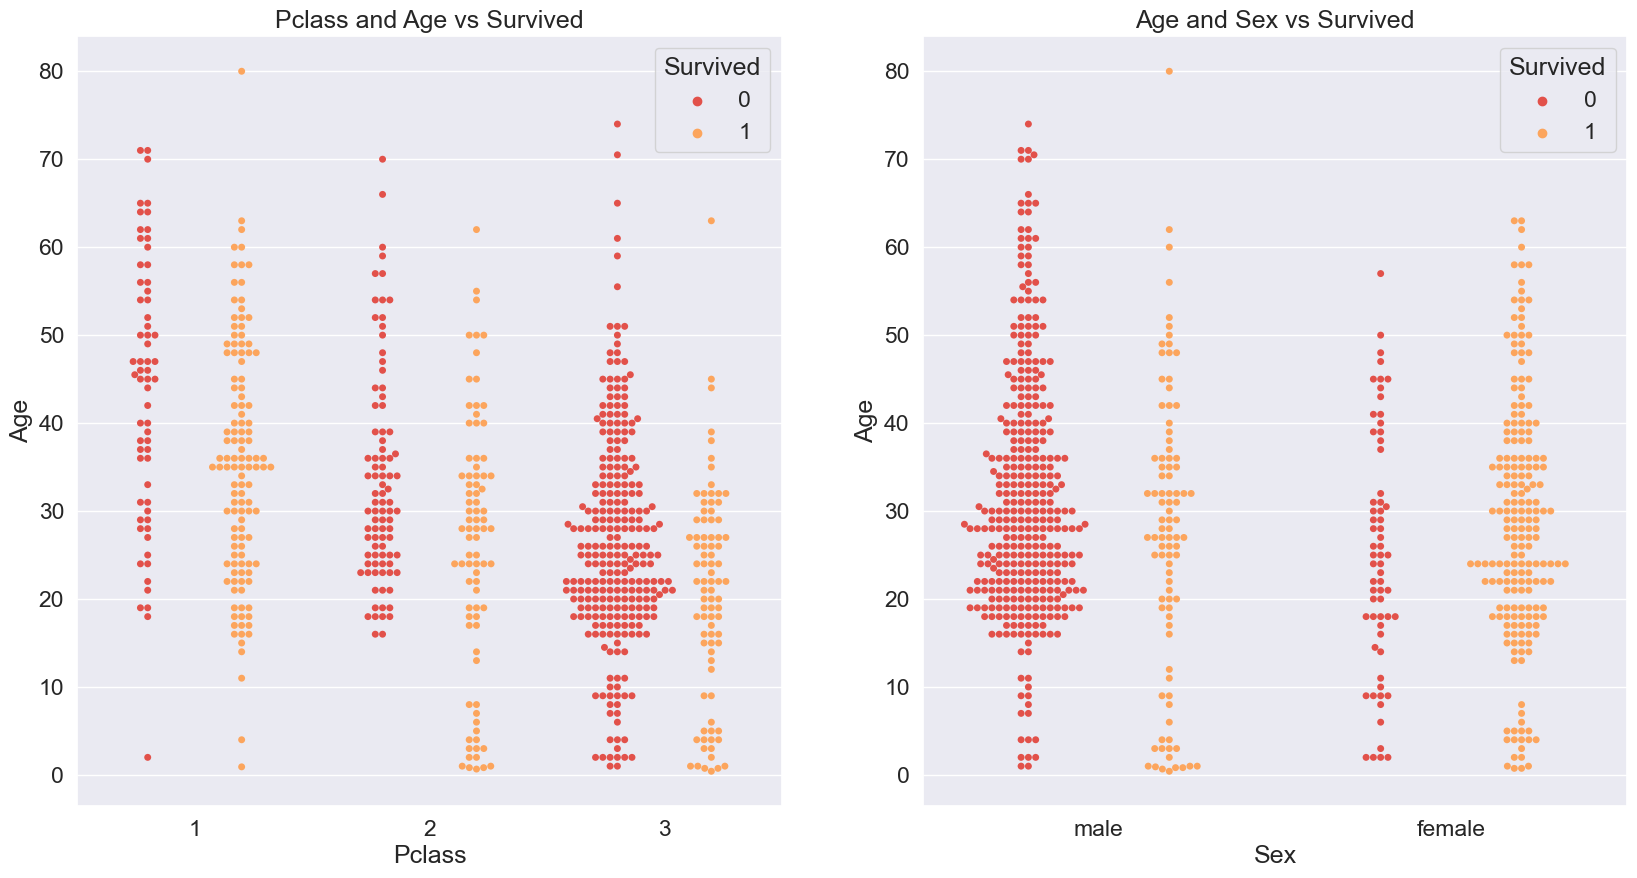

In [16]:
#code
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.swarmplot(data=dataset, x="Pclass", y="Age", hue="Survived", dodge=True)
plt.title('Pclass and Age vs Survived')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.swarmplot(data=dataset, x="Sex", y="Age", hue="Survived", dodge=True)
plt.title('Age and Sex vs Survived')
plt.show()

##### На графіках зображено розподіл кількості людей, які вижили та загинули відповідно до віку та статі

**Задача 8** Побудуйте наступні діаграми розподілів:  

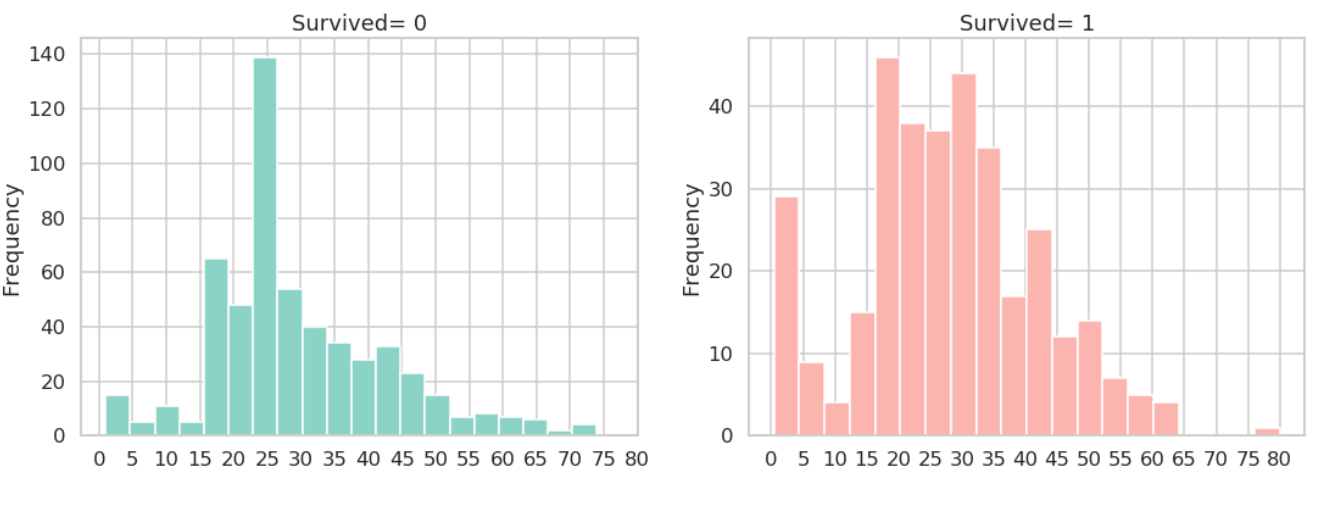



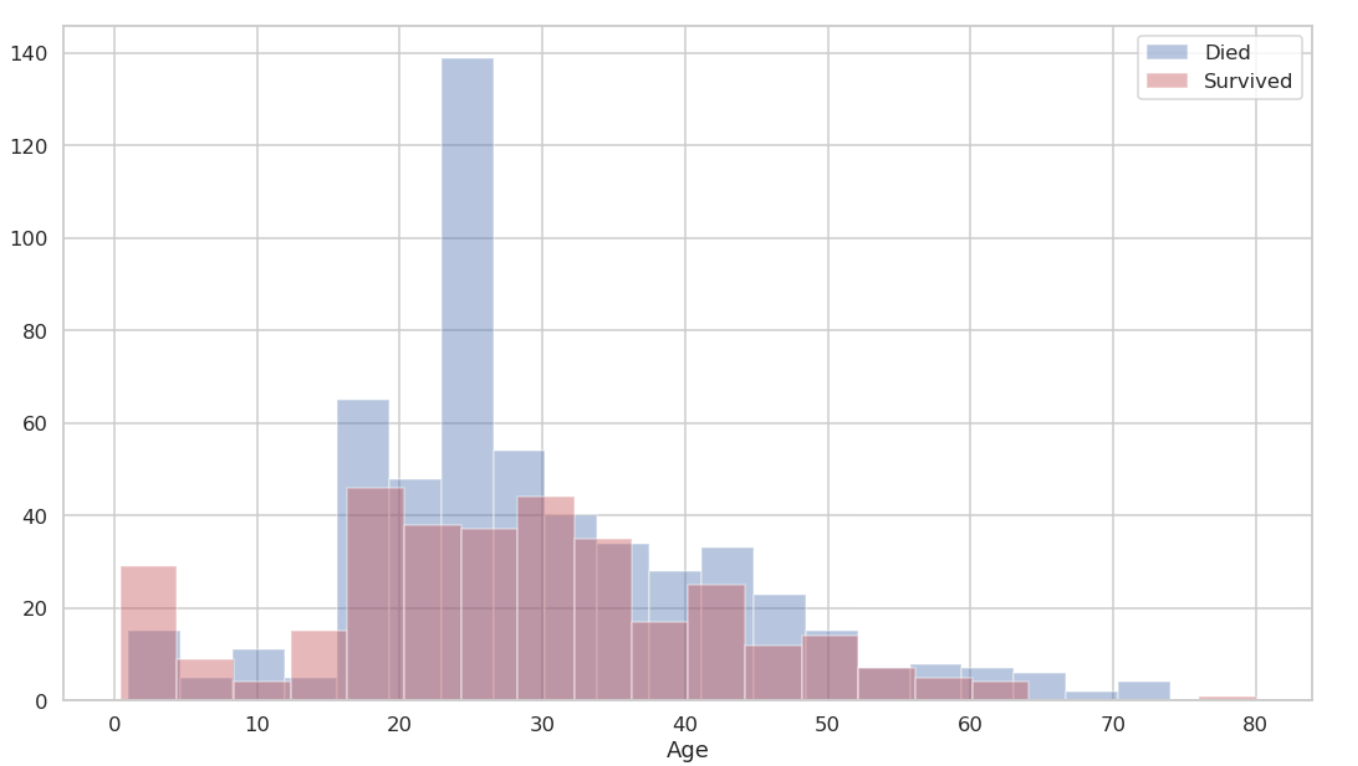

In [25]:
data = dataset.loc[dataset['Survived'] == 1]
data

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
875      0              2667   7.2250   NaN        C  
879      1             11767  83.1583   C50        C  
880      1            230433  26.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  

[342 rows x 12 columns]

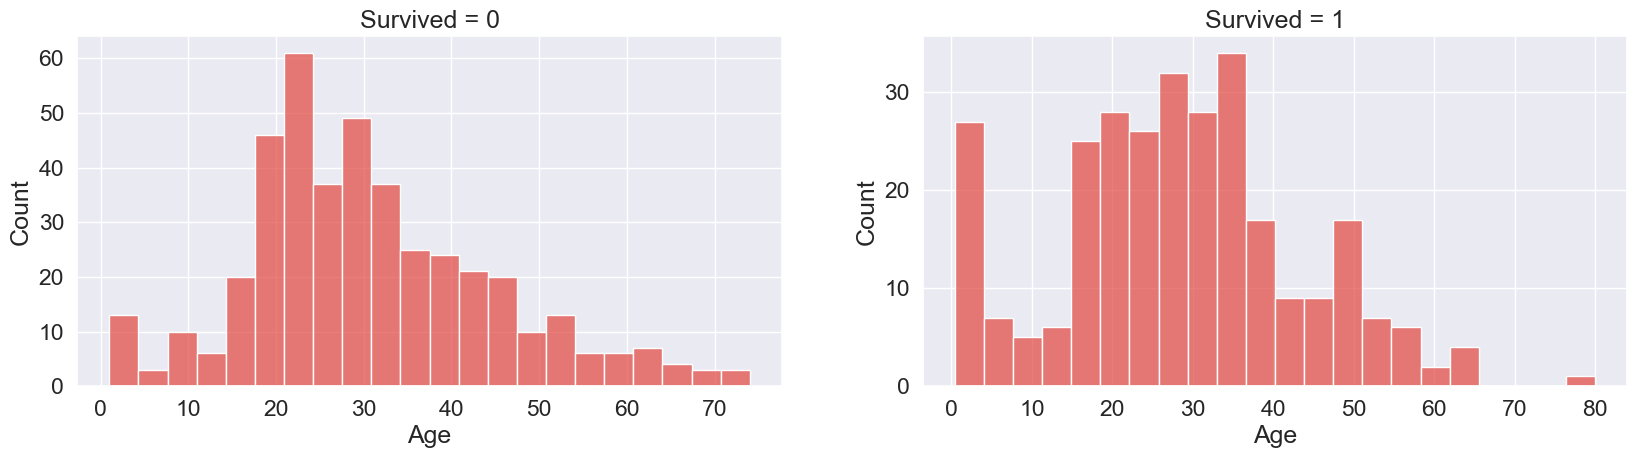

In [47]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.histplot(x = 'Age', data = dataset.loc[dataset['Survived'] == 0], bins=22)
plt.title('Survived = 0')


ax2 = plt.subplot2grid((2,2),(0,1))
sns.histplot(x = 'Age', data = dataset.loc[dataset['Survived'] == 1],bins=22)
plt.title('Survived = 1')

plt.show()

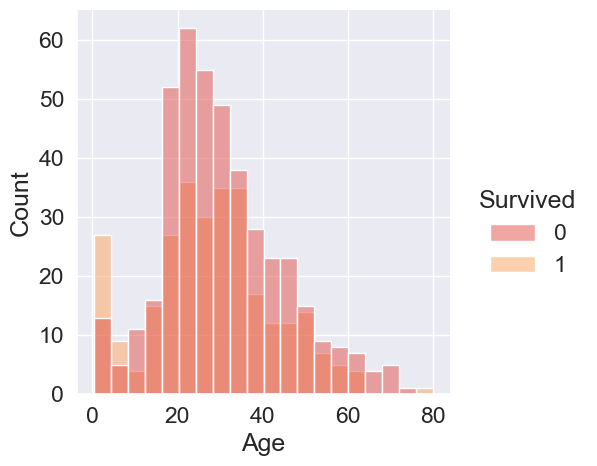

In [51]:
sns.displot(dataset, x='Age', hue = 'Survived')

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
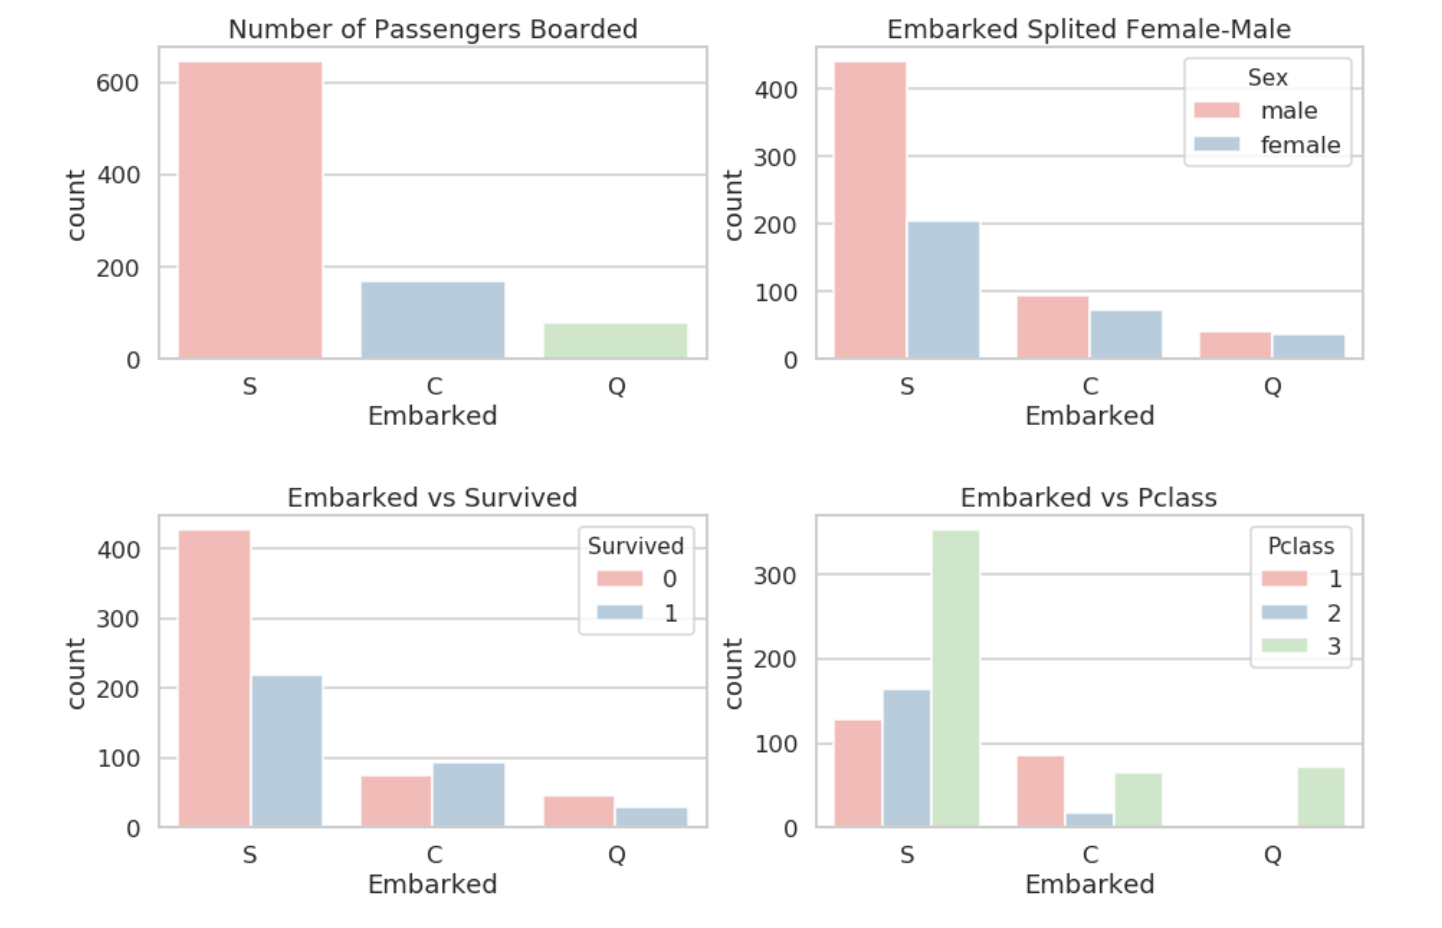

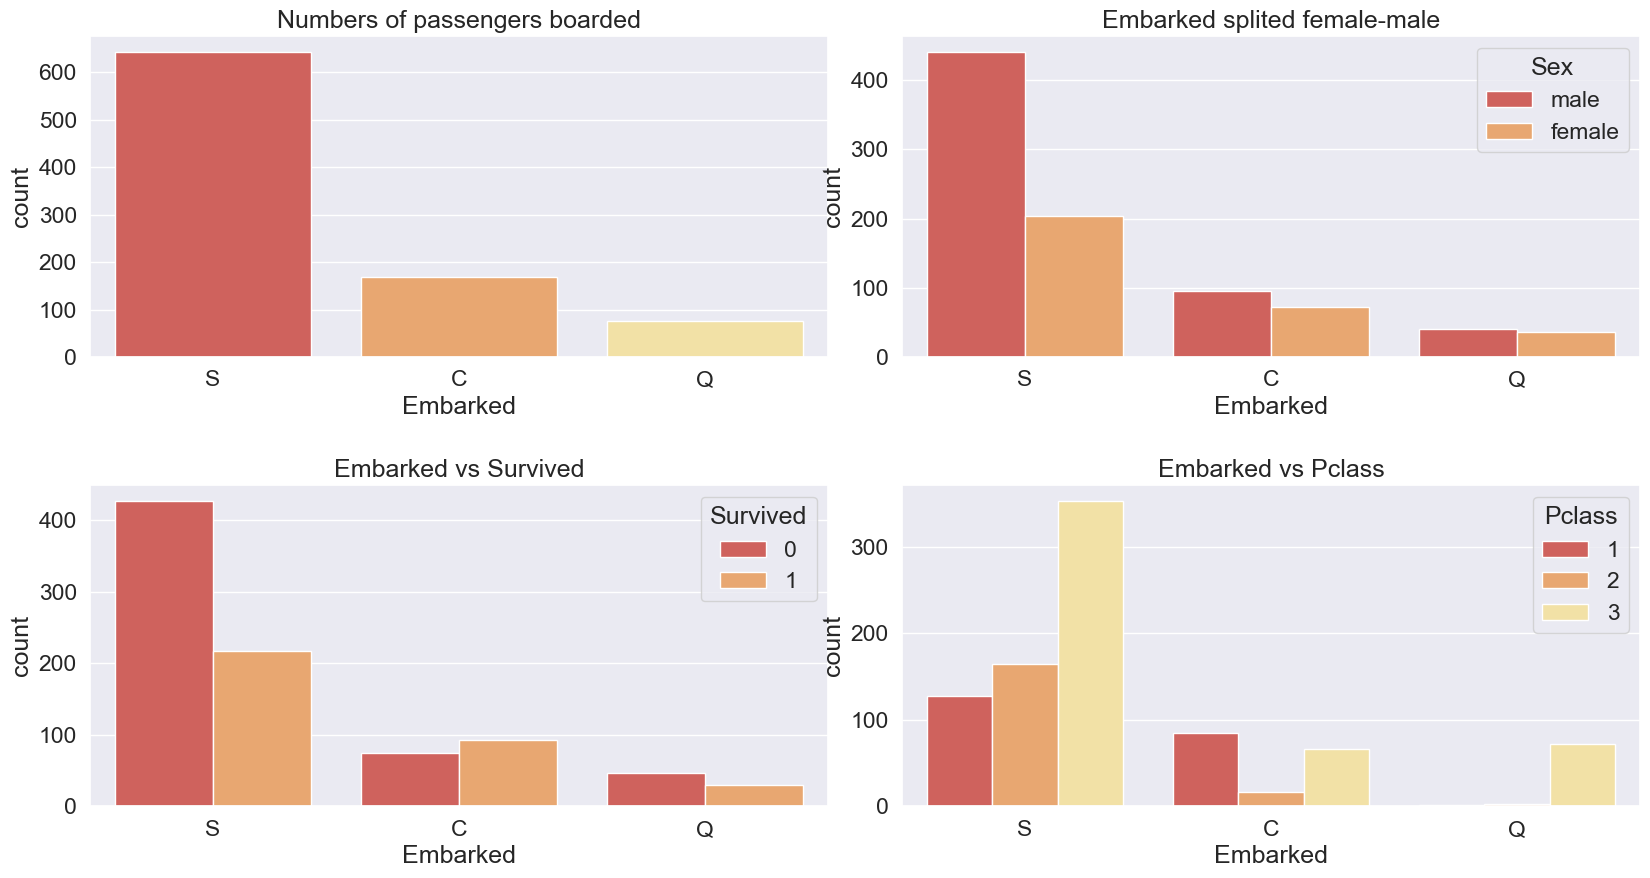

In [18]:
#code
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(x = 'Embarked', data = dataset)
plt.title('Numbers of passengers boarded')

ax2 = plt.subplot2grid((2,2),(0,1))
sns.countplot(x = 'Embarked', hue = 'Sex', data = dataset)
plt.title('Embarked splited female-male')

ax3 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = 'Embarked', hue = 'Survived', data = dataset)
plt.title('Embarked vs Survived')

ax4 = plt.subplot2grid((2,2), (1,1))
sns.countplot(x = 'Embarked', hue = 'Pclass', data = dataset)
plt.title('Embarked vs Pclass')

plt.show()

##### Графік 1 відображає кількість людей, які сіли на корабль в кожному порту
##### Графік 2 відображає кількісний розподіл людей відповідно до статі, які сіли на корабль в кожному порту
##### Графік 3 відображає кількісний розподіл людей, які вижили, відповідно до кожного порта 
##### Графік 4 відображає кількісний розподіл людей по класам, відповідно до кожного порта,в якому вони зайшли на борт

#### Отже, з графіків можна зробити висновок, що найбільший % на виживання у пасажирів, які зайшли на борт у порту С

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

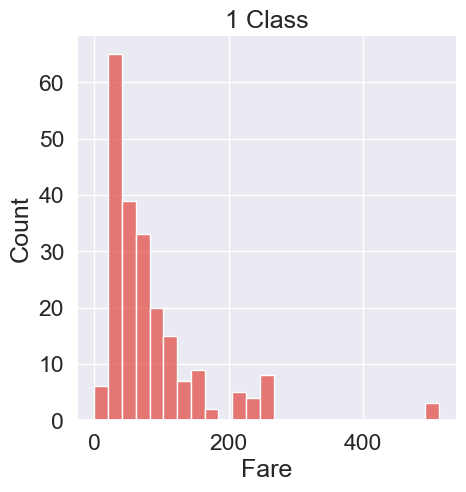

In [74]:
#code
sns.displot(dataset.loc[dataset['Pclass'] == 1], x='Fare')
plt.title('1 Class')
plt.show()

На графіку зображено розподіл ціни квитка для 1 класу

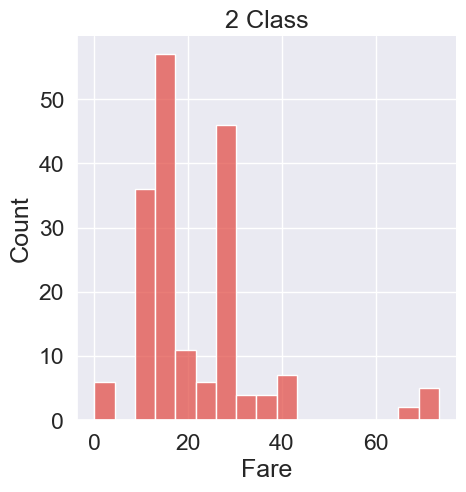

In [63]:
sns.displot(dataset.loc[dataset['Pclass'] == 2], x='Fare')
plt.title('2 Class')
plt.show()

На графіку зображено розподіл ціни квитка для 2 класу

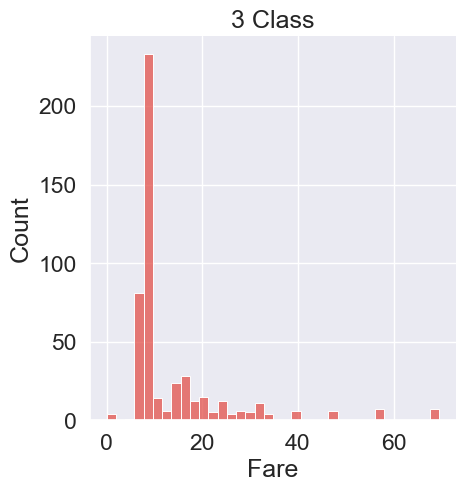

In [68]:
sns.displot(dataset.loc[dataset['Pclass'] == 3], x='Fare')
plt.title('3 Class')
plt.show()

На графіку зображено розподіл ціни квитка для 3 класу

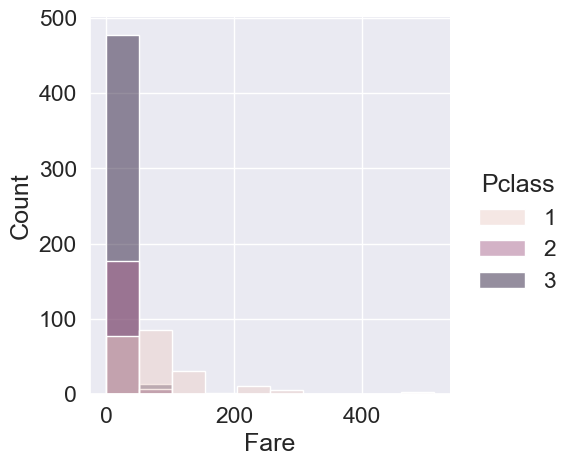

In [73]:
sns.displot(dataset, x='Fare', hue = 'Pclass', bins=10)
plt.show()

На графіку зображено розподіл ціни квитка для усіх класів